In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import proximal, proximal_nmf, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

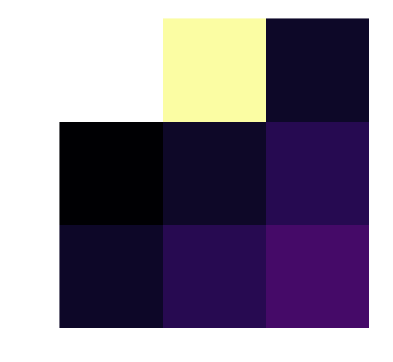

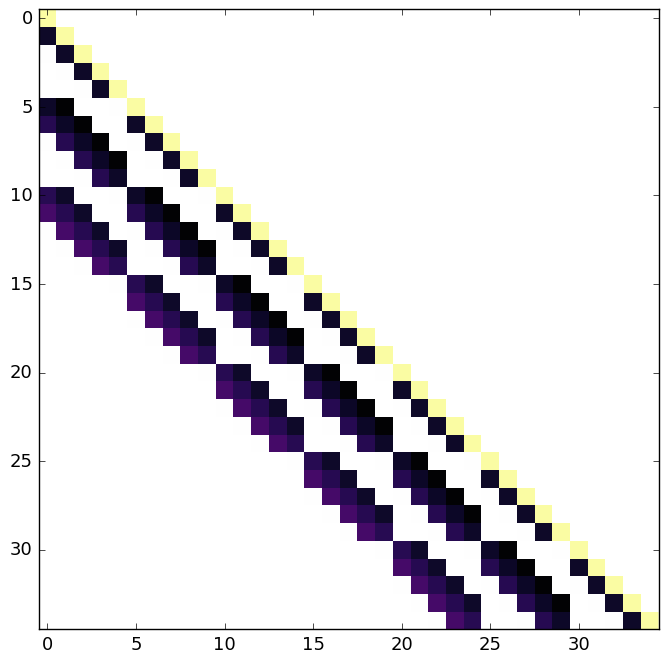

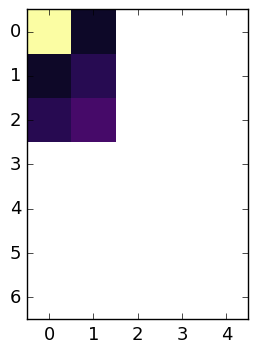

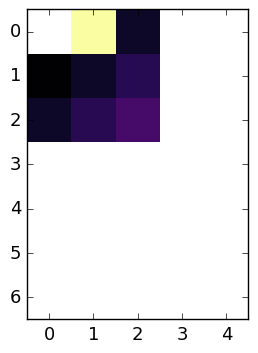

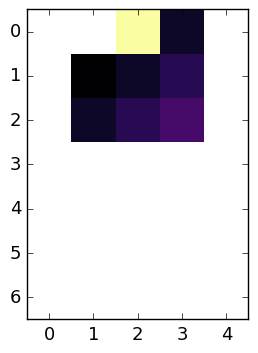

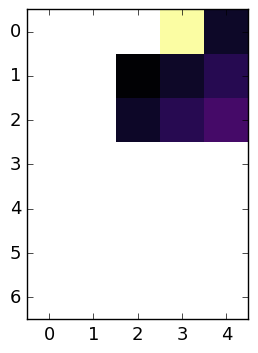

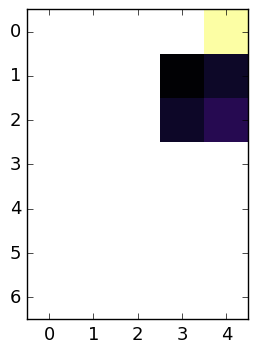

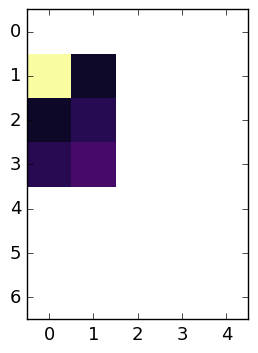

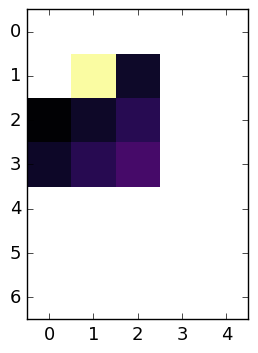

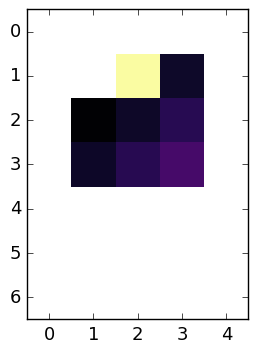

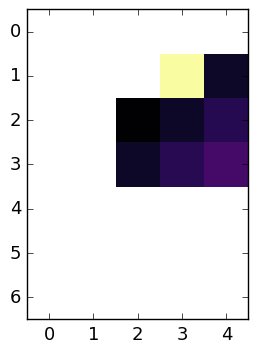

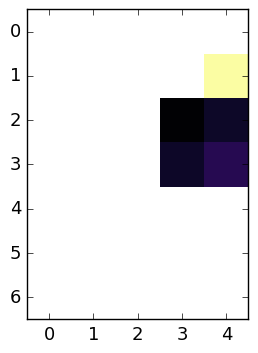

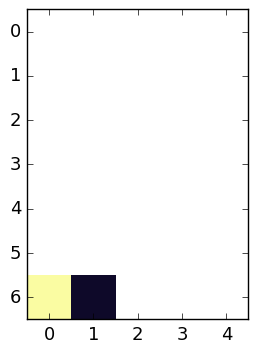

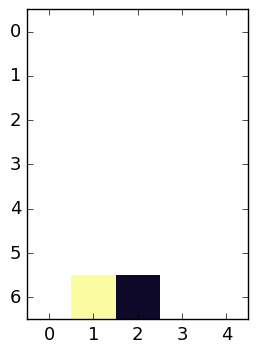

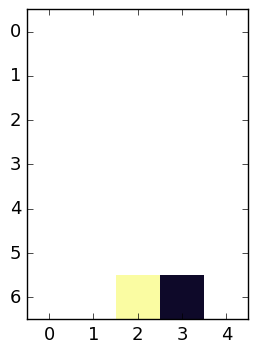

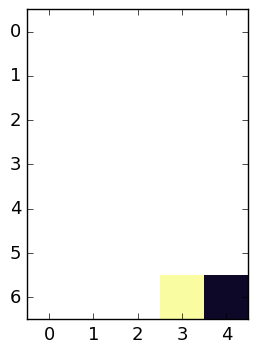

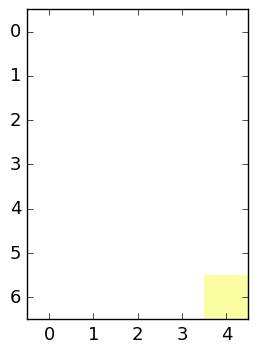

In [2]:
def testPsfOp(psf, shape):
    height, width = shape
    pHeight, pWidth = psf.shape
    size = height*width
    
    display.maskPlot(psf)
    psfOp, coords = proximal_nmf.createPsfOperator(psf, shape, threshold=1e-2)
    psfArr = psfOp.toarray()
    plt.figure(figsize=(8,8))
    display.maskPlot(psfArr[:200,:200], hideAxes=False)
    plt.show()
    
    vmin = np.min(psfArr[psfArr>0])
    vmax = np.max(psfArr)
    
    for n in range(width):
        test = np.zeros(shape)
        test[0,n] = 1
        result = psfOp.dot(test.flatten())
        display.maskPlot(result.reshape(test.shape), hideAxes=False, vmin=vmin, vmax=vmax)
        plt.show()
    
    for n in range(width):
        test = np.zeros(shape)
        test[int((pWidth-1)/2),n] = 1
        result = psfOp.dot(test.flatten())
        display.maskPlot(result.reshape(test.shape), hideAxes=False, vmin=vmin, vmax=vmax)
        plt.show()
    
    for n in range(width):
        test = np.zeros(shape)
        test[-1,n] = 1
        result = psfOp.dot(test.flatten())
        display.maskPlot(result.reshape(test.shape), hideAxes=False, vmin=vmin, vmax=vmax)
        plt.show()

x = np.arange(3)
y = np.arange(3)
X,Y = np.meshgrid(x,y)
psf = X+Y
#psf[1,1] = 15
psf[0,1] = 15
shape = (7, 5)
testPsfOp(psf, shape)

In [3]:
def gauss2d(x, y, theta=0, x0=0, y0=0, A=1, sigmaX=3, sigmaY=3):
    cos2 = np.cos(theta)**2/2
    sin2 = np.sin(theta)**2/2
    a = cos2/sigmaX**2 + sin2/sigmaY**2
    b = -np.sin(2*theta)/(4*sigmaX**2)+np.sin(2*theta)/(4*sigmaY**2)
    c = sin2/sigmaX**2 + cos2/sigmaY**2
    print(cos2, sin2, a, b, c)
    
    return A*np.exp(-(a*(x-x0)**2-2*b*(x-x0)*(y-y0)+c*(y-y0)**2))

0.5 0.0 0.125 0.0 0.125


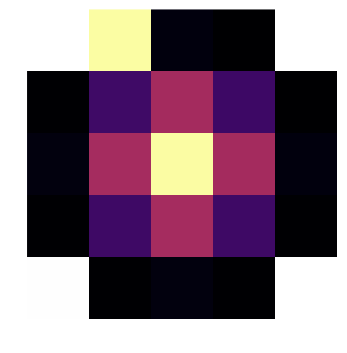

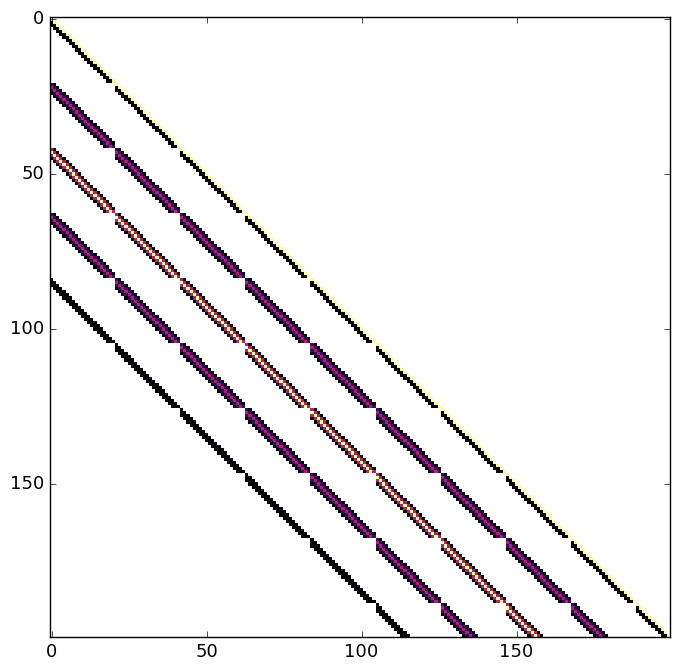

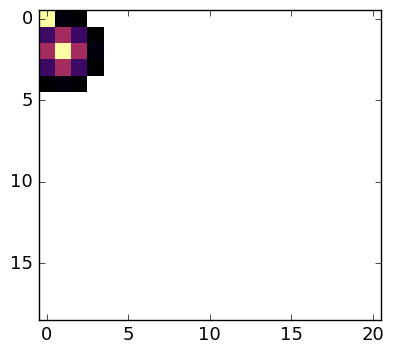

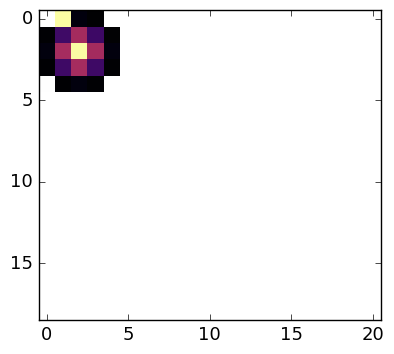

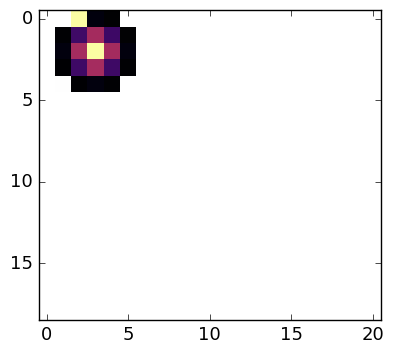

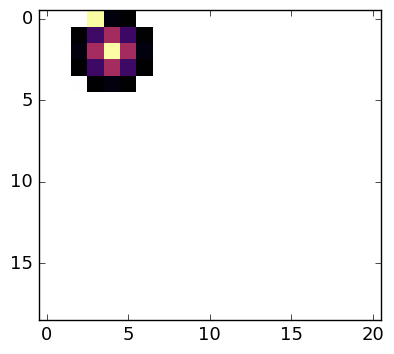

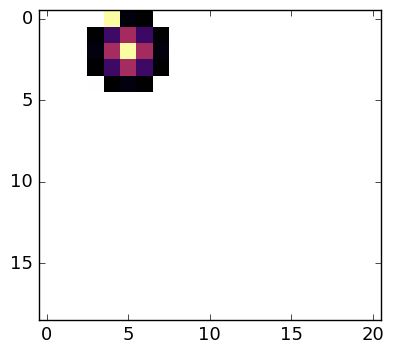

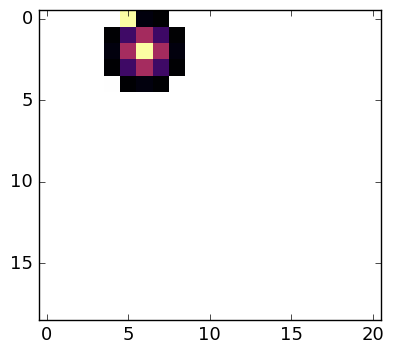

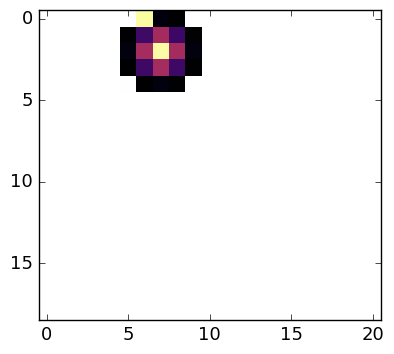

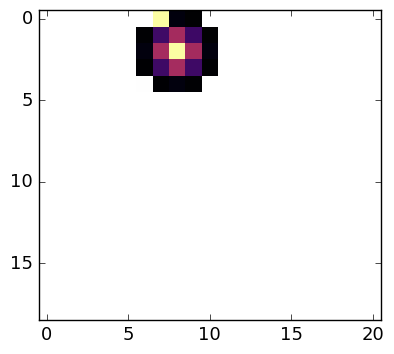

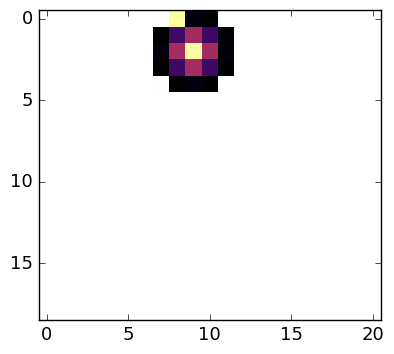

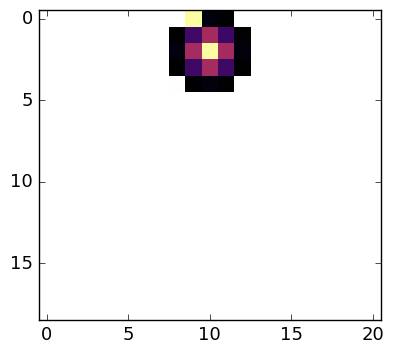

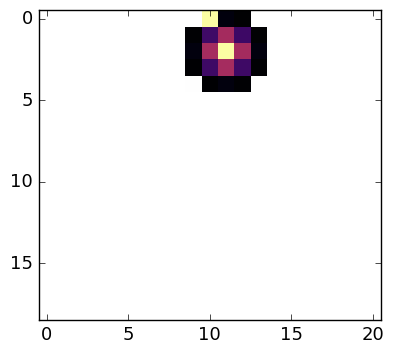

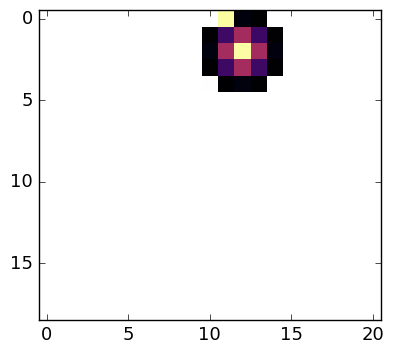

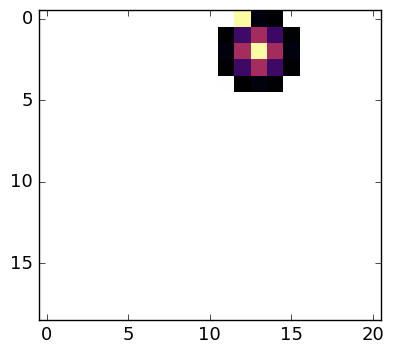

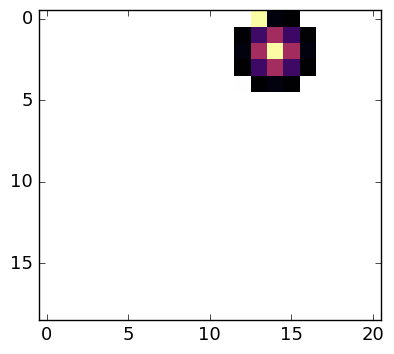

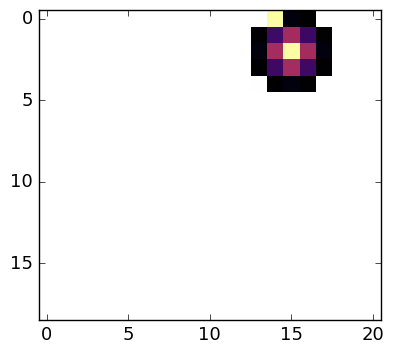

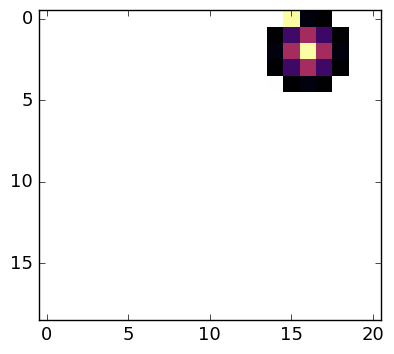

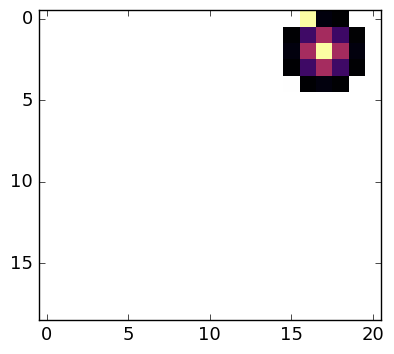

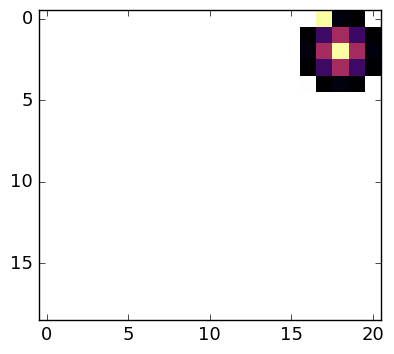

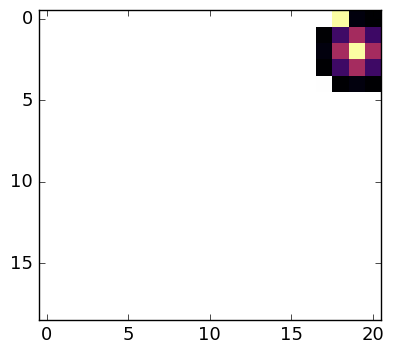

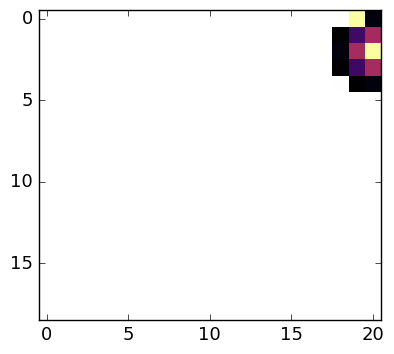

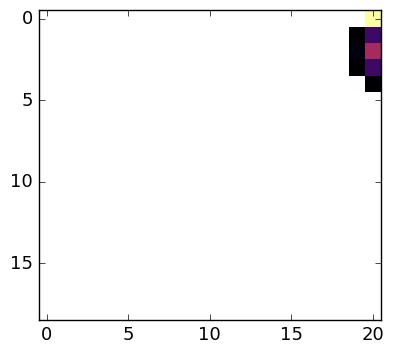

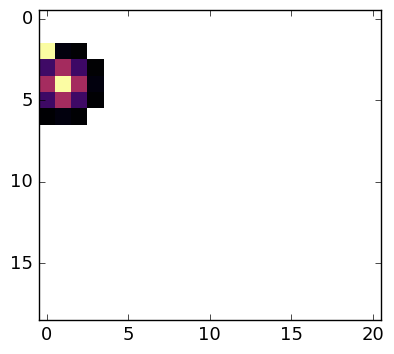

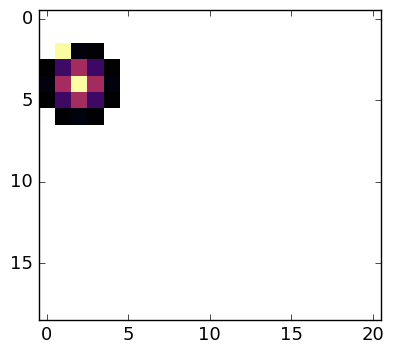

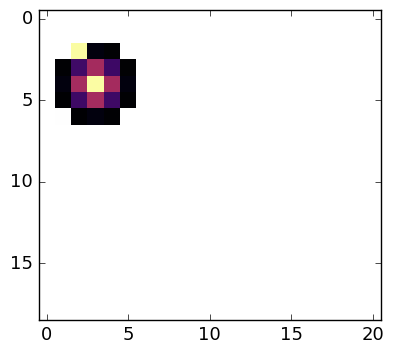

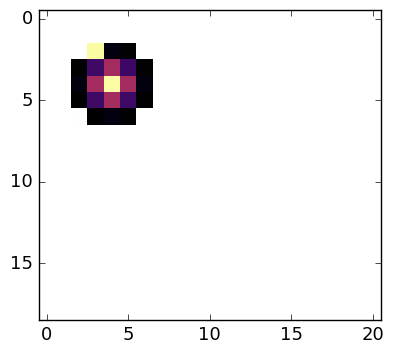

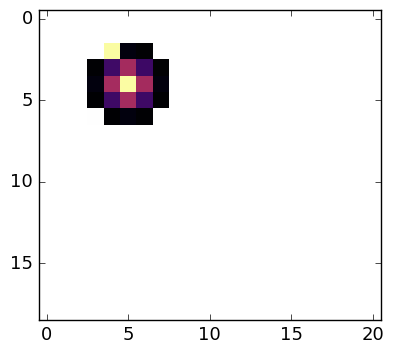

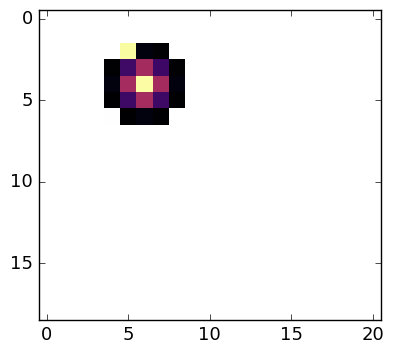

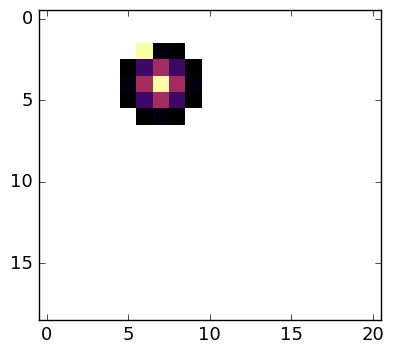

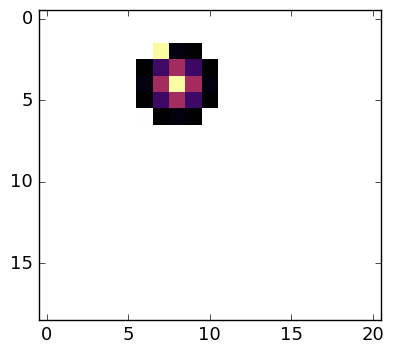

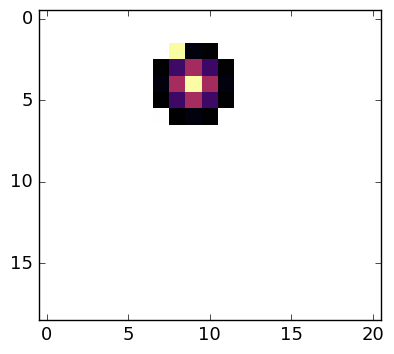

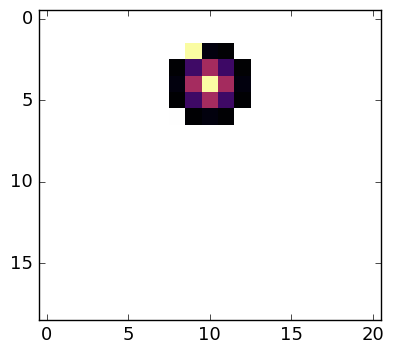

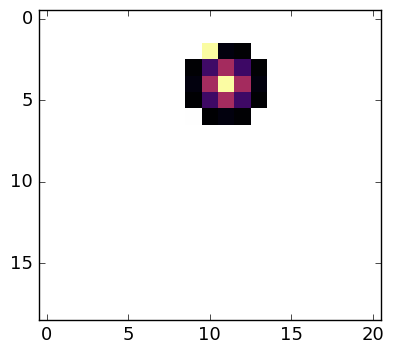

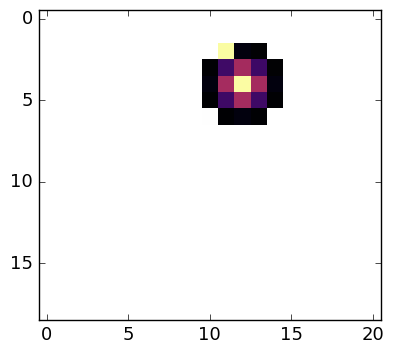

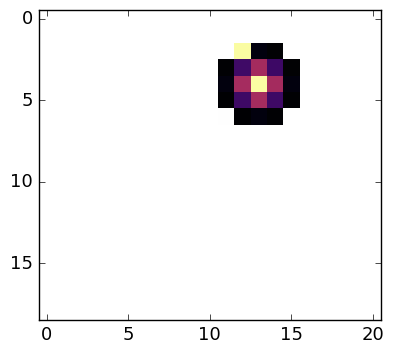

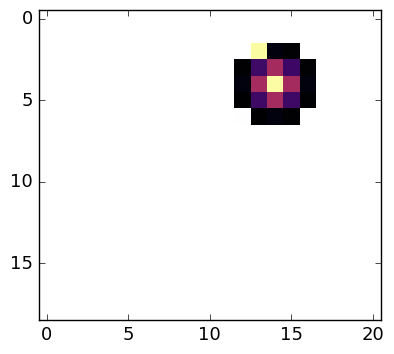

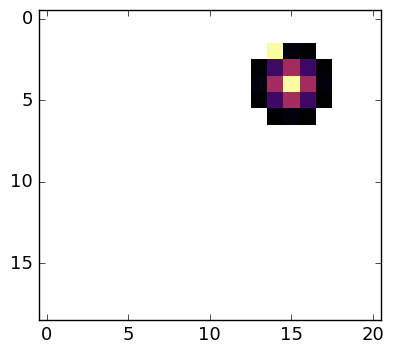

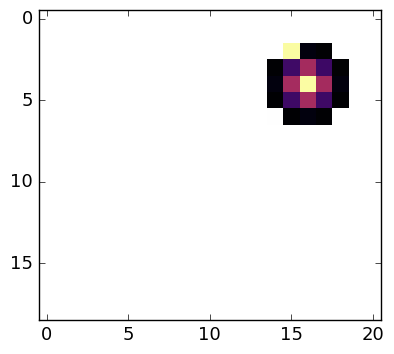

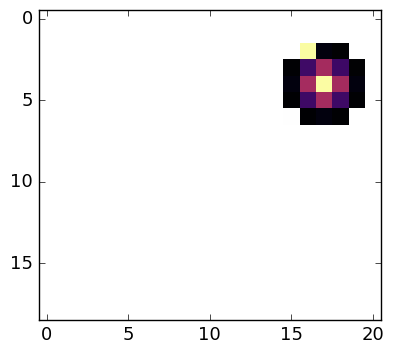

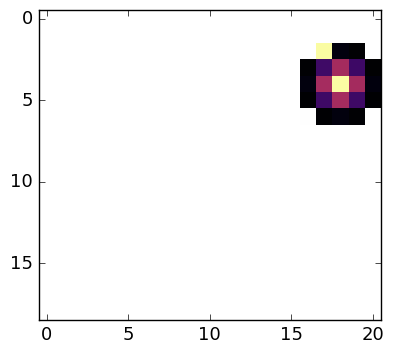

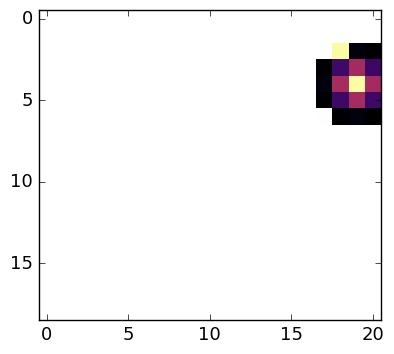

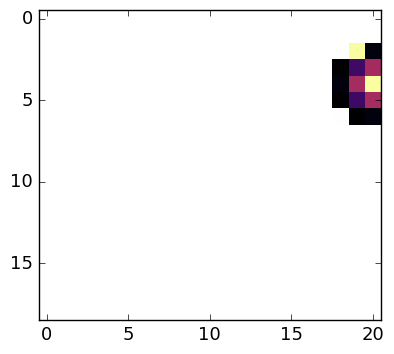

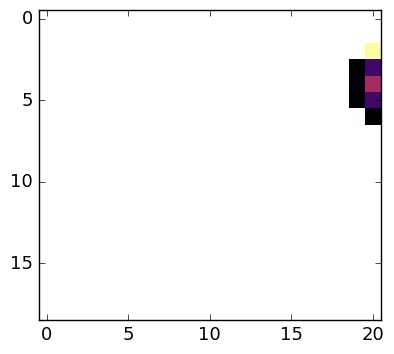

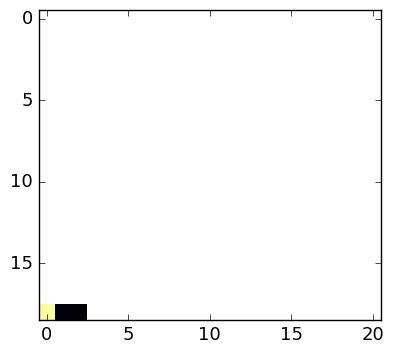

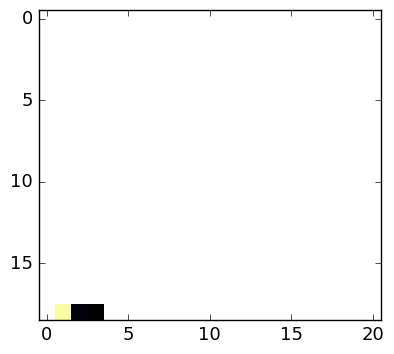

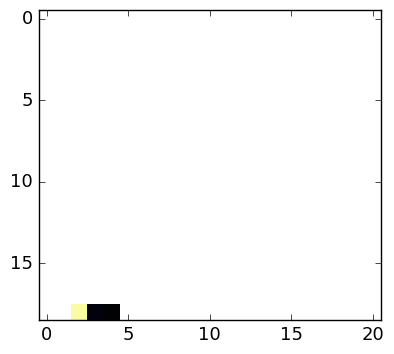

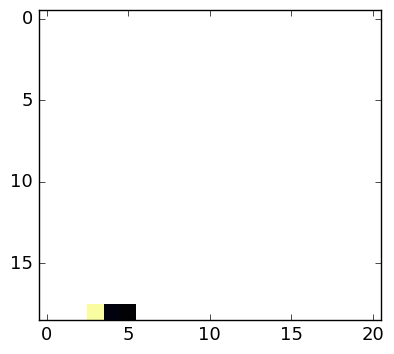

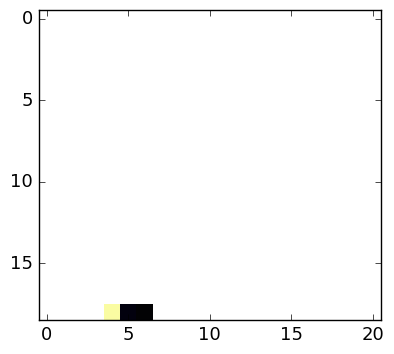

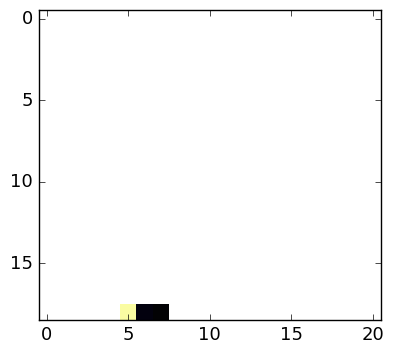

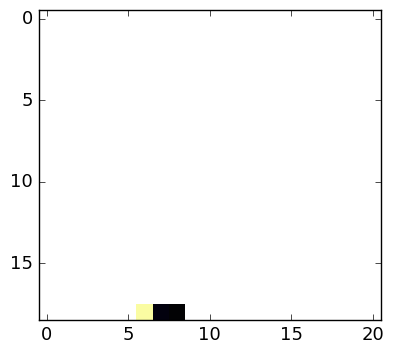

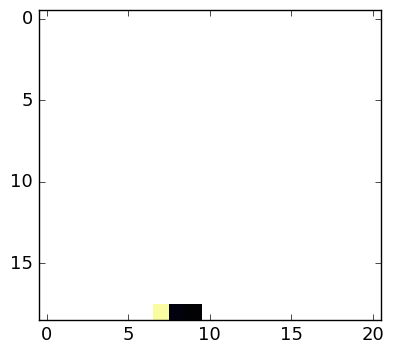

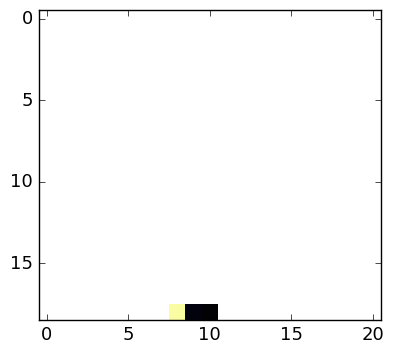

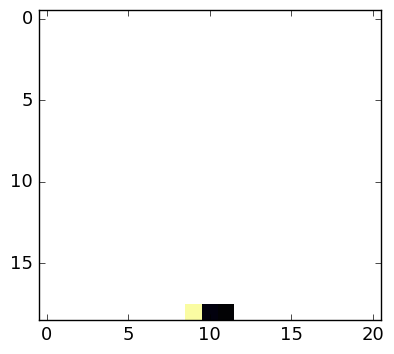

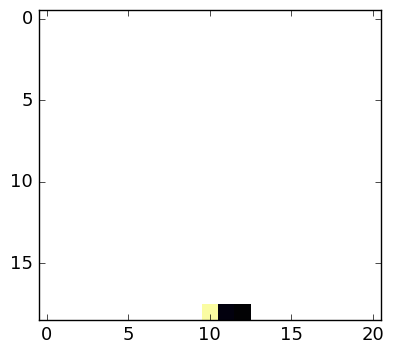

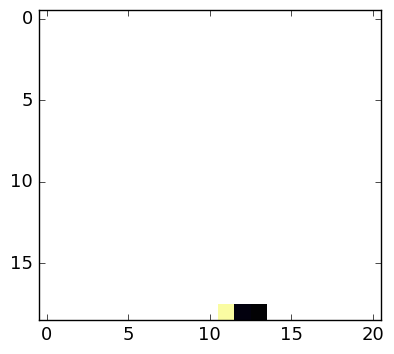

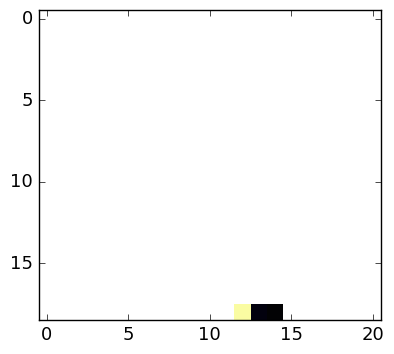

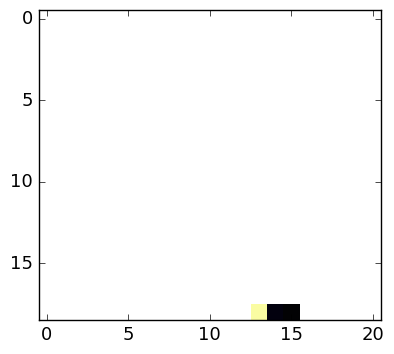

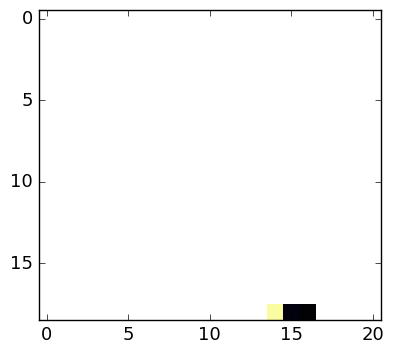

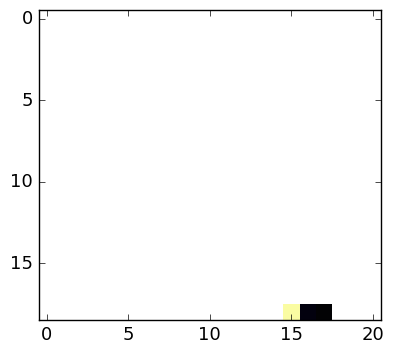

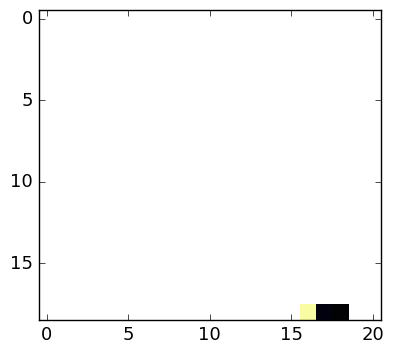

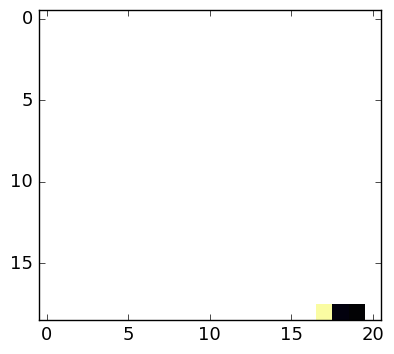

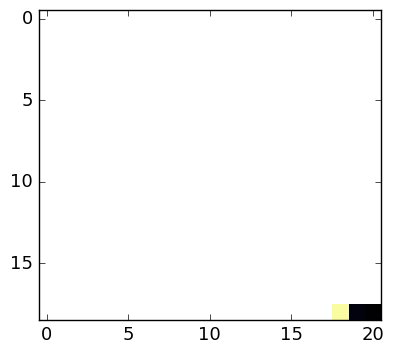

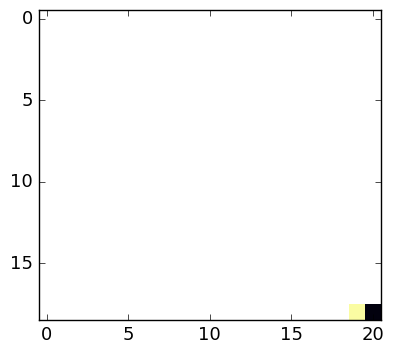

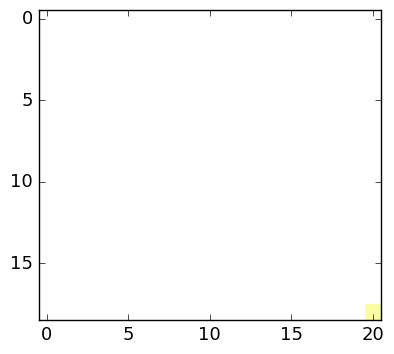

In [4]:
pShape = (5,5)
shape = (19, 21)
height, width = pShape

x = np.linspace(-width, width, width)
y = np.linspace(-height, height, height)
X, Y = np.meshgrid(x, y)

psf = 2*gauss2d(X, Y, 0, sigmaX=2, sigmaY = 2)
psf[psf<1e-2] = 0
# Add an extra pixel to break the symmetry
psf[0,1] = 2
#psf[:,3:] = psf[:,3:]*2
#psf[:2,:] = psf[:2,:]*2


testPsfOp(psf, shape)

0.5 0.0 0.0555555555556 0.0 0.0555555555556


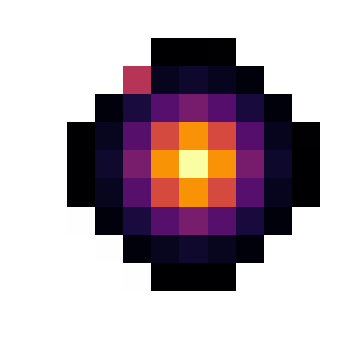

max 1.0
min 0.0


In [5]:
shape = (11,11)
height, width = shape

x = np.linspace(-width, width, width)
y = np.linspace(-height, height, height)
X, Y = np.meshgrid(x, y)

psf = gauss2d(X, Y, 0)
psf[psf<1e-2] = 0
psf[2,3] = .5
display.maskPlot(psf, psf==0)
print("max", np.max(psf))
print("min", np.min(psf))

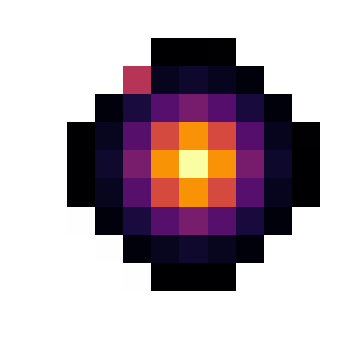

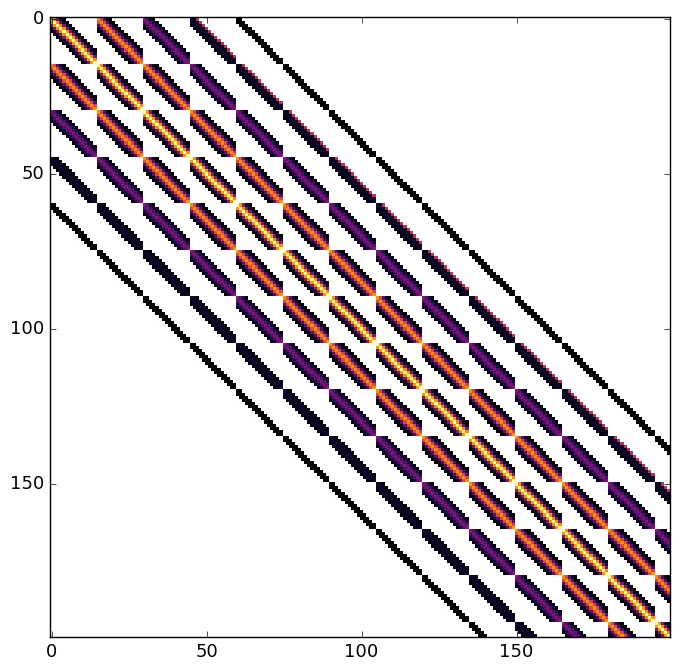

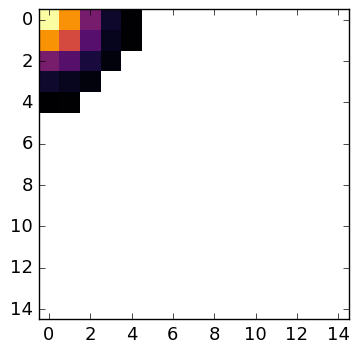

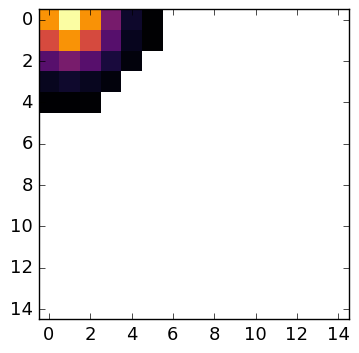

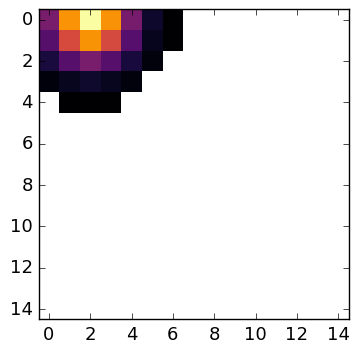

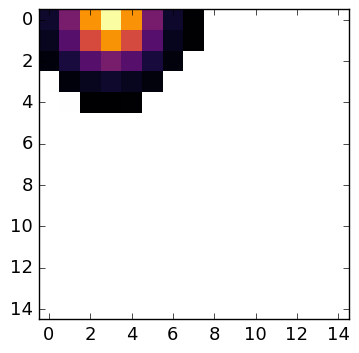

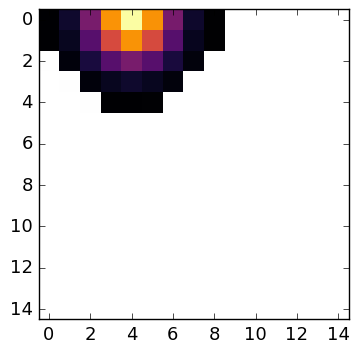

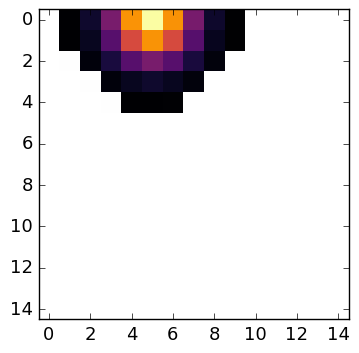

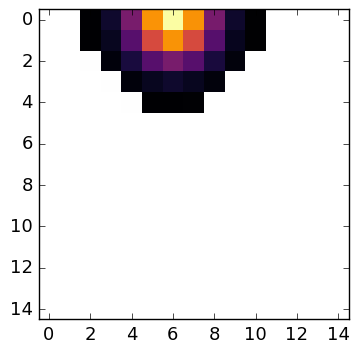

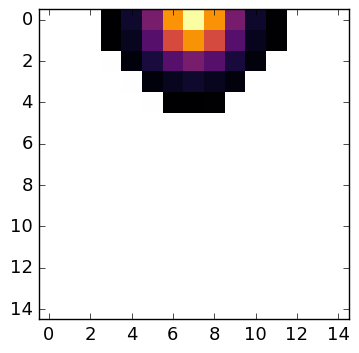

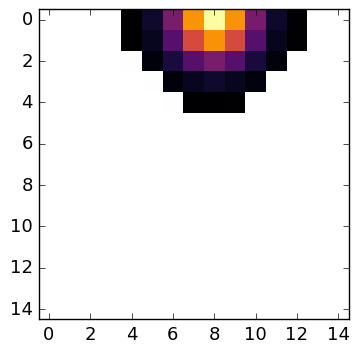

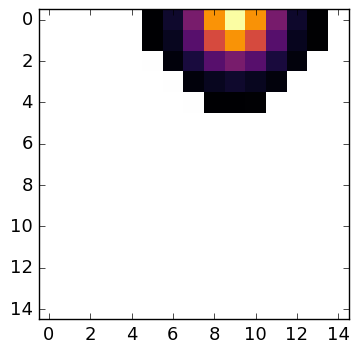

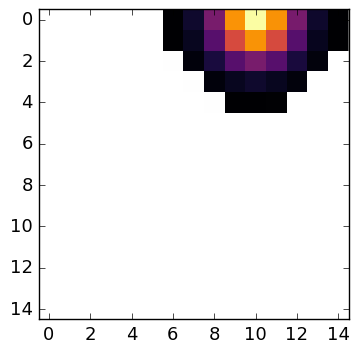

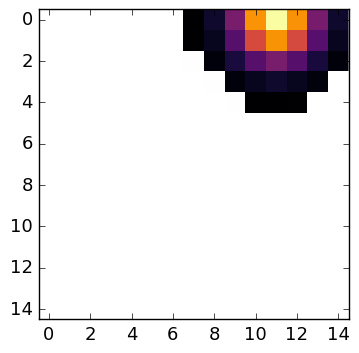

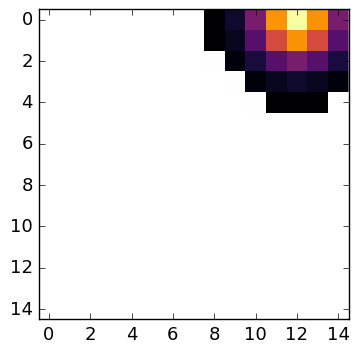

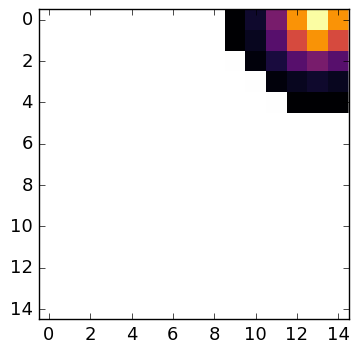

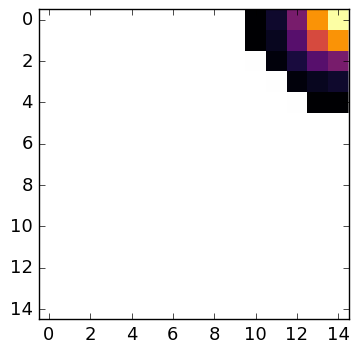

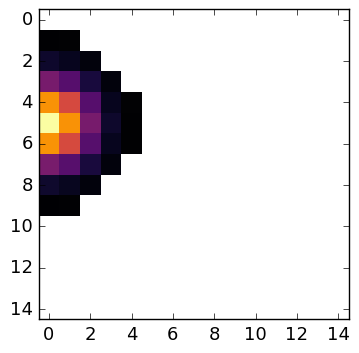

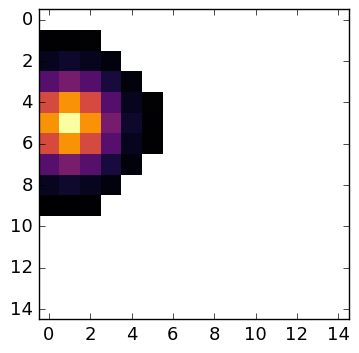

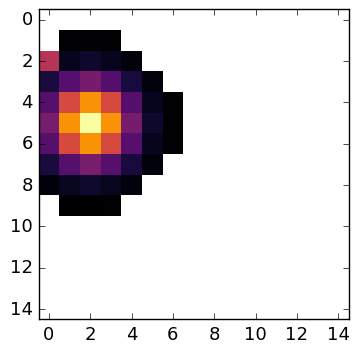

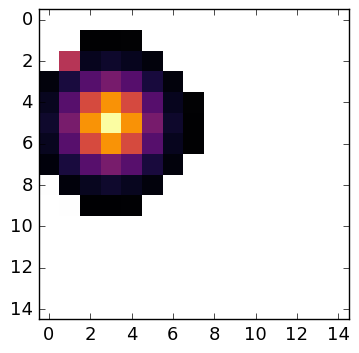

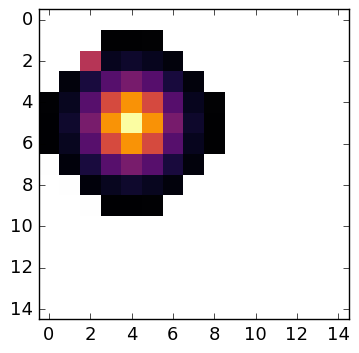

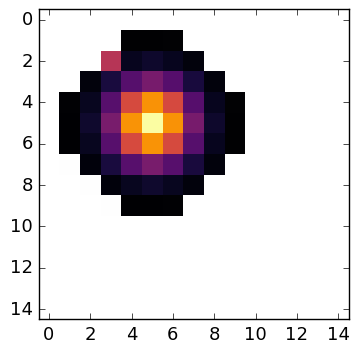

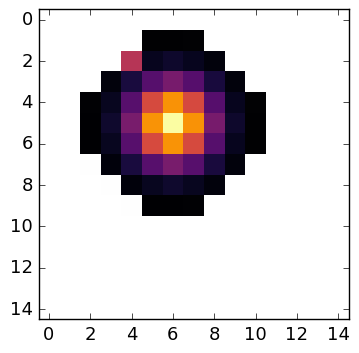

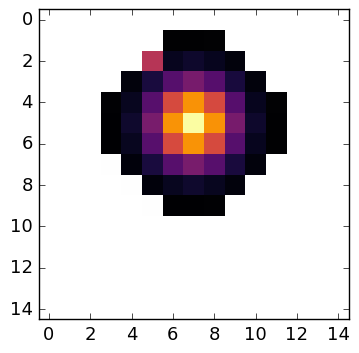

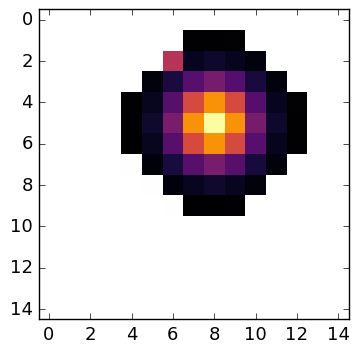

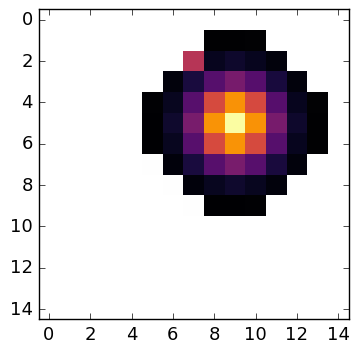

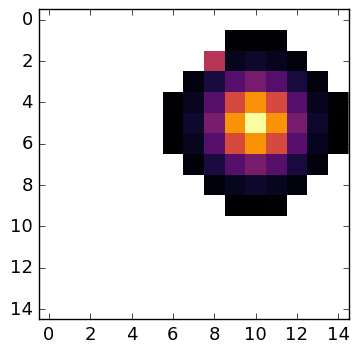

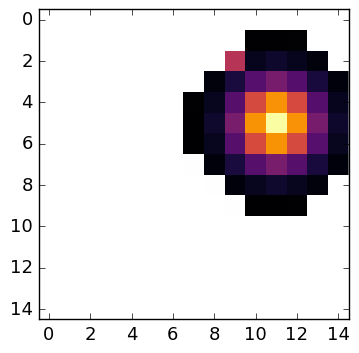

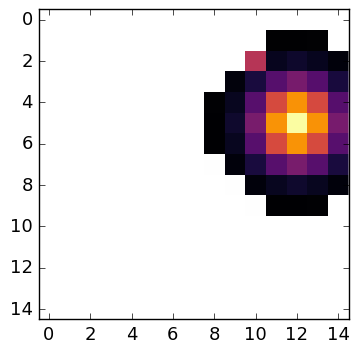

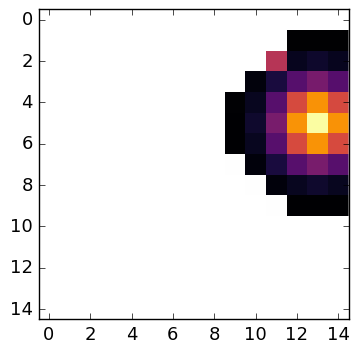

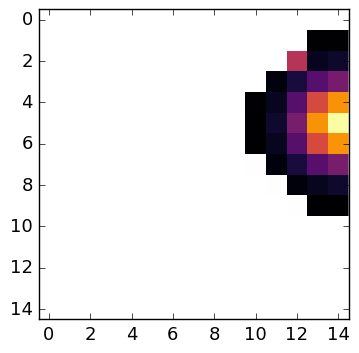

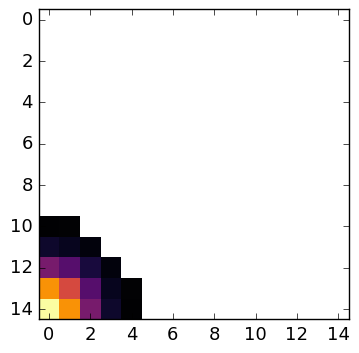

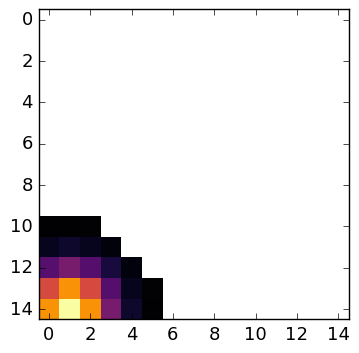

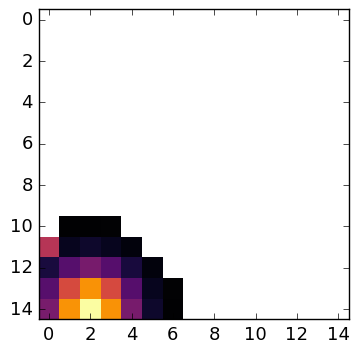

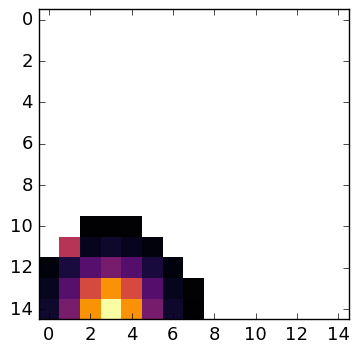

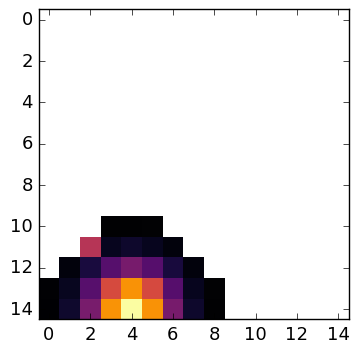

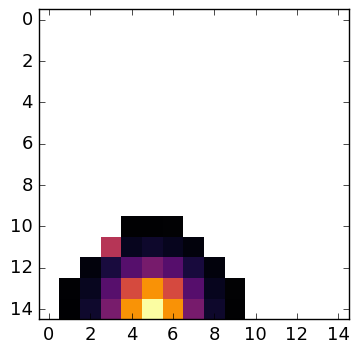

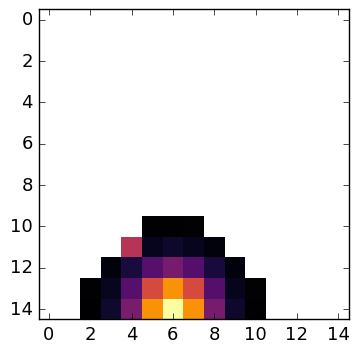

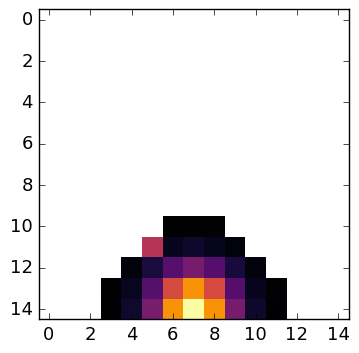

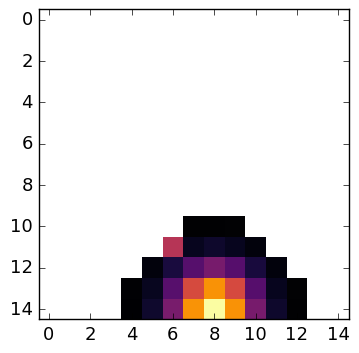

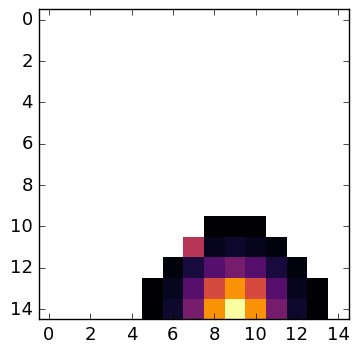

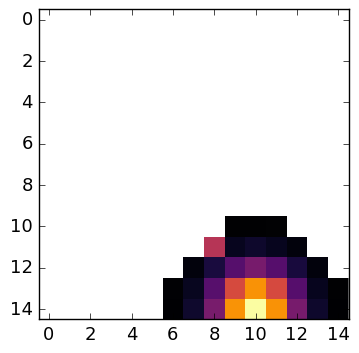

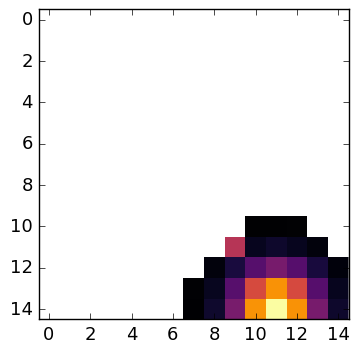

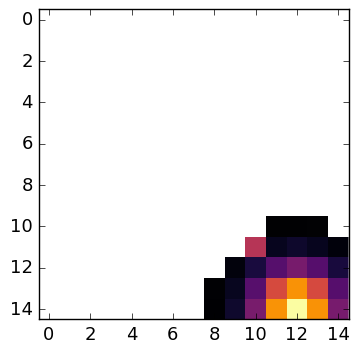

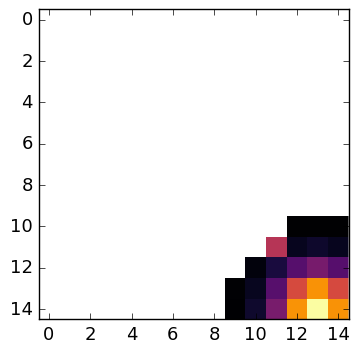

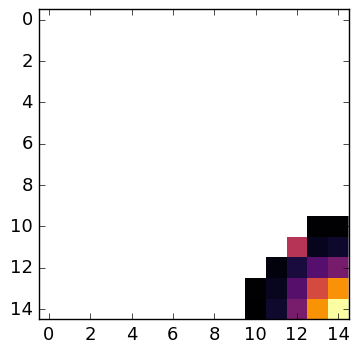

In [6]:
testPsfOp(psf, (15,15))